# Part 1: Word Vectors
[CS224n: Natural Language Processing with Deep Learning](https://web.stanford.edu/class/cs224n/).

In this section I try to use the knowledge of the [word vector knowledge](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1214/slides/cs224n-2021-lecture01-wordvecs1.pdf) but using a different corpus - oil and gas corpus from the Language Technology Group at the University of Oslo.

#### Oil and Gas Corpus dataset

source: http://vectors.nlpl.eu/repository/
ID: 75 
```yaml 
"creators": [
        {
            "email": "farhadno@ifi.uio.no",
            "name": "Farhad Nooralahzadeh"
        }
    ],
"dimensions": 400,
"handle": "http://vectors.nlpl.eu/repository/20/75.zip",
"id": 75,
"iterations": 5,
"vocabulary size": 285055,
"window": 5
```


## Word Vectors for Oil and Gas

In [14]:
# Code extract from CS224n: https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1214/materials/Gensim%20word%20vector%20visualization.html
import numpy as np

# Get the interactive Tools for Matplotlib
#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors, fasttext
from gensim.scripts.glove2word2vec import glove2word2vec

In [2]:
# !pip install gensim=="3.8.3"

### Using Stanford GloVe word vectors

In [3]:
glove_file = datapath('/Users/castrma/Datasets/nlp/stanford_cs224n_corpus/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [6]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [7]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('tall', 'tallest', 'long')

'longest'

In [8]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

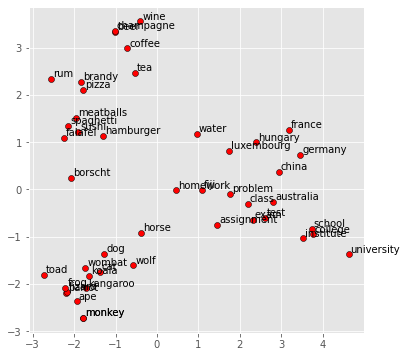

In [9]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

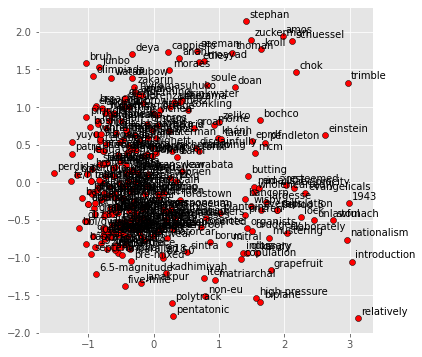

In [10]:
display_pca_scatterplot(model, sample=300)

### Using Oil & Gas Dataset

In [18]:
glove_file = datapath('/Users/castrma/Datasets/nlp/oil_gas_corpus/model.txt')
word2vec_glove_file = get_tmpfile("oil_gas_corpus.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(285055, 400)

In [19]:
model_oilgas = KeyedVectors.load_word2vec_format(word2vec_glove_file, binary=False, unicode_errors='replace')

In [20]:
model_oilgas.most_similar('flow')

[('transport', 0.48656901717185974),
 ('centrifugal_force', 0.48010045289993286),
 ('outflow', 0.4763485789299011),
 ('overspill', 0.4571435749530792),
 ('sheetflow', 0.4376390874385834),
 ('discharge', 0.4367856979370117),
 ('overflow', 0.43440309166908264),
 ('high-concentration', 0.4244910478591919),
 ('flowa', 0.4212402403354645),
 ('pseudoplastic', 0.42077863216400146)]

In [21]:
model_oilgas.most_similar('valve')

[('shell', 0.5183584094047546),
 ('dorsal_valve', 0.48694050312042236),
 ('ventral_dorsal', 0.485264390707016),
 ('articulated_bivalve', 0.4750818610191345),
 ('dorsal_ventral', 0.4613734185695648),
 ('ventral_valve', 0.46133625507354736),
 ('disarticulate_valve', 0.45661646127700806),
 ('ostracode_valve', 0.44902393221855164),
 ('ventral', 0.444169282913208),
 ('frustule', 0.4327666759490967)]

In [45]:
model_oilgas.most_similar('test')

[('testing', 0.7121846079826355),
 ('check', 0.525799572467804),
 ('verify', 0.5179010629653931),
 ('reject_null', 0.497518926858902),
 ('validate', 0.4902019798755646),
 ('two-sample', 0.46922433376312256),
 ('t-test', 0.45723795890808105),
 ('kolmogorov-smirnov', 0.45683586597442627),
 ('evaluate', 0.4561232924461365),
 ('experiment', 0.45235615968704224)]

In [25]:
model_oilgas.most_similar('tubing')

[('casing', 0.6231992840766907),
 ('liner', 0.6099902391433716),
 ('coiled_tubing', 0.6039292812347412),
 ('annulus', 0.5939675569534302),
 ('tubing_string', 0.5494505167007446),
 ('coil_tubing', 0.547163188457489),
 ('cylinder', 0.5449304580688477),
 ('sleeve', 0.5374123454093933),
 ('wellhead', 0.534071683883667),
 ('packer', 0.5303264856338501)]

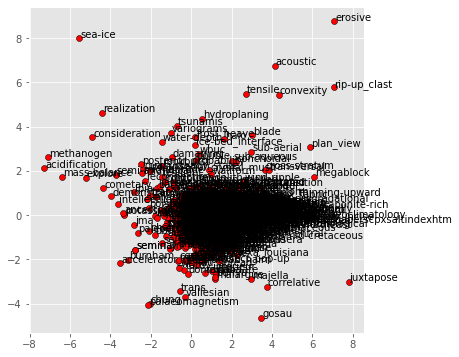

In [30]:
display_pca_scatterplot(model_oilgas, sample=1000)

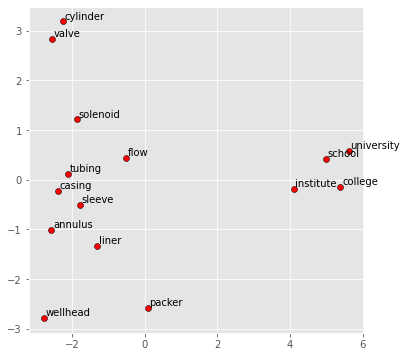

In [39]:
# 'coiled_tubing', 'tubing_string', 'coil_tubing' noy in vocabulary?
display_pca_scatterplot(model, 
                        ['tubing', 'valve', 'flow', 'solenoid',
                         'casing', 'liner',  'annulus', 'cylinder', 'sleeve', 'wellhead','packer',
                         'school', 'college', 'university', 'institute'])